In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [198]:
players_stat_df_list = utils.get_dataframes_csv_file('../scraping/csv/players_stats')
# schedule_df_list = get_dataframes_csv_file('../scraping/csv/schedule' )
# standing_df_list = get_dataframes_csv_file('../scraping/csv/standing')
# team_stats_df_list = get_dataframes_csv_file('../scraping/csv/team_stats')
# team_stats_opponent_df_list = get_dataframes_csv_file('../scraping/csv/team_stats_opponent')
# team_stats_differential_df_list = get_dataframes_csv_file('../scraping/csv/team_stats_differential')

In [199]:
types_saison = []
for df in players_stat_df_list:
    titre = df['Title'].iloc[0]  
    type_saison = titre.split(' ')[-3]  
    if type_saison not in types_saison:
        types_saison.append(type_saison)

print('Les différents types de saison :')
for saison in types_saison:
    print(saison)

Les différents types de saison :
Summer_League
Playoffs
Regular_Season
Preseason


### Moyenne des points par saison  

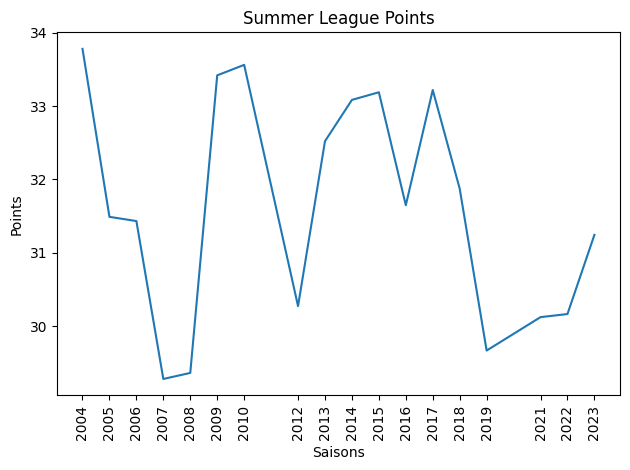

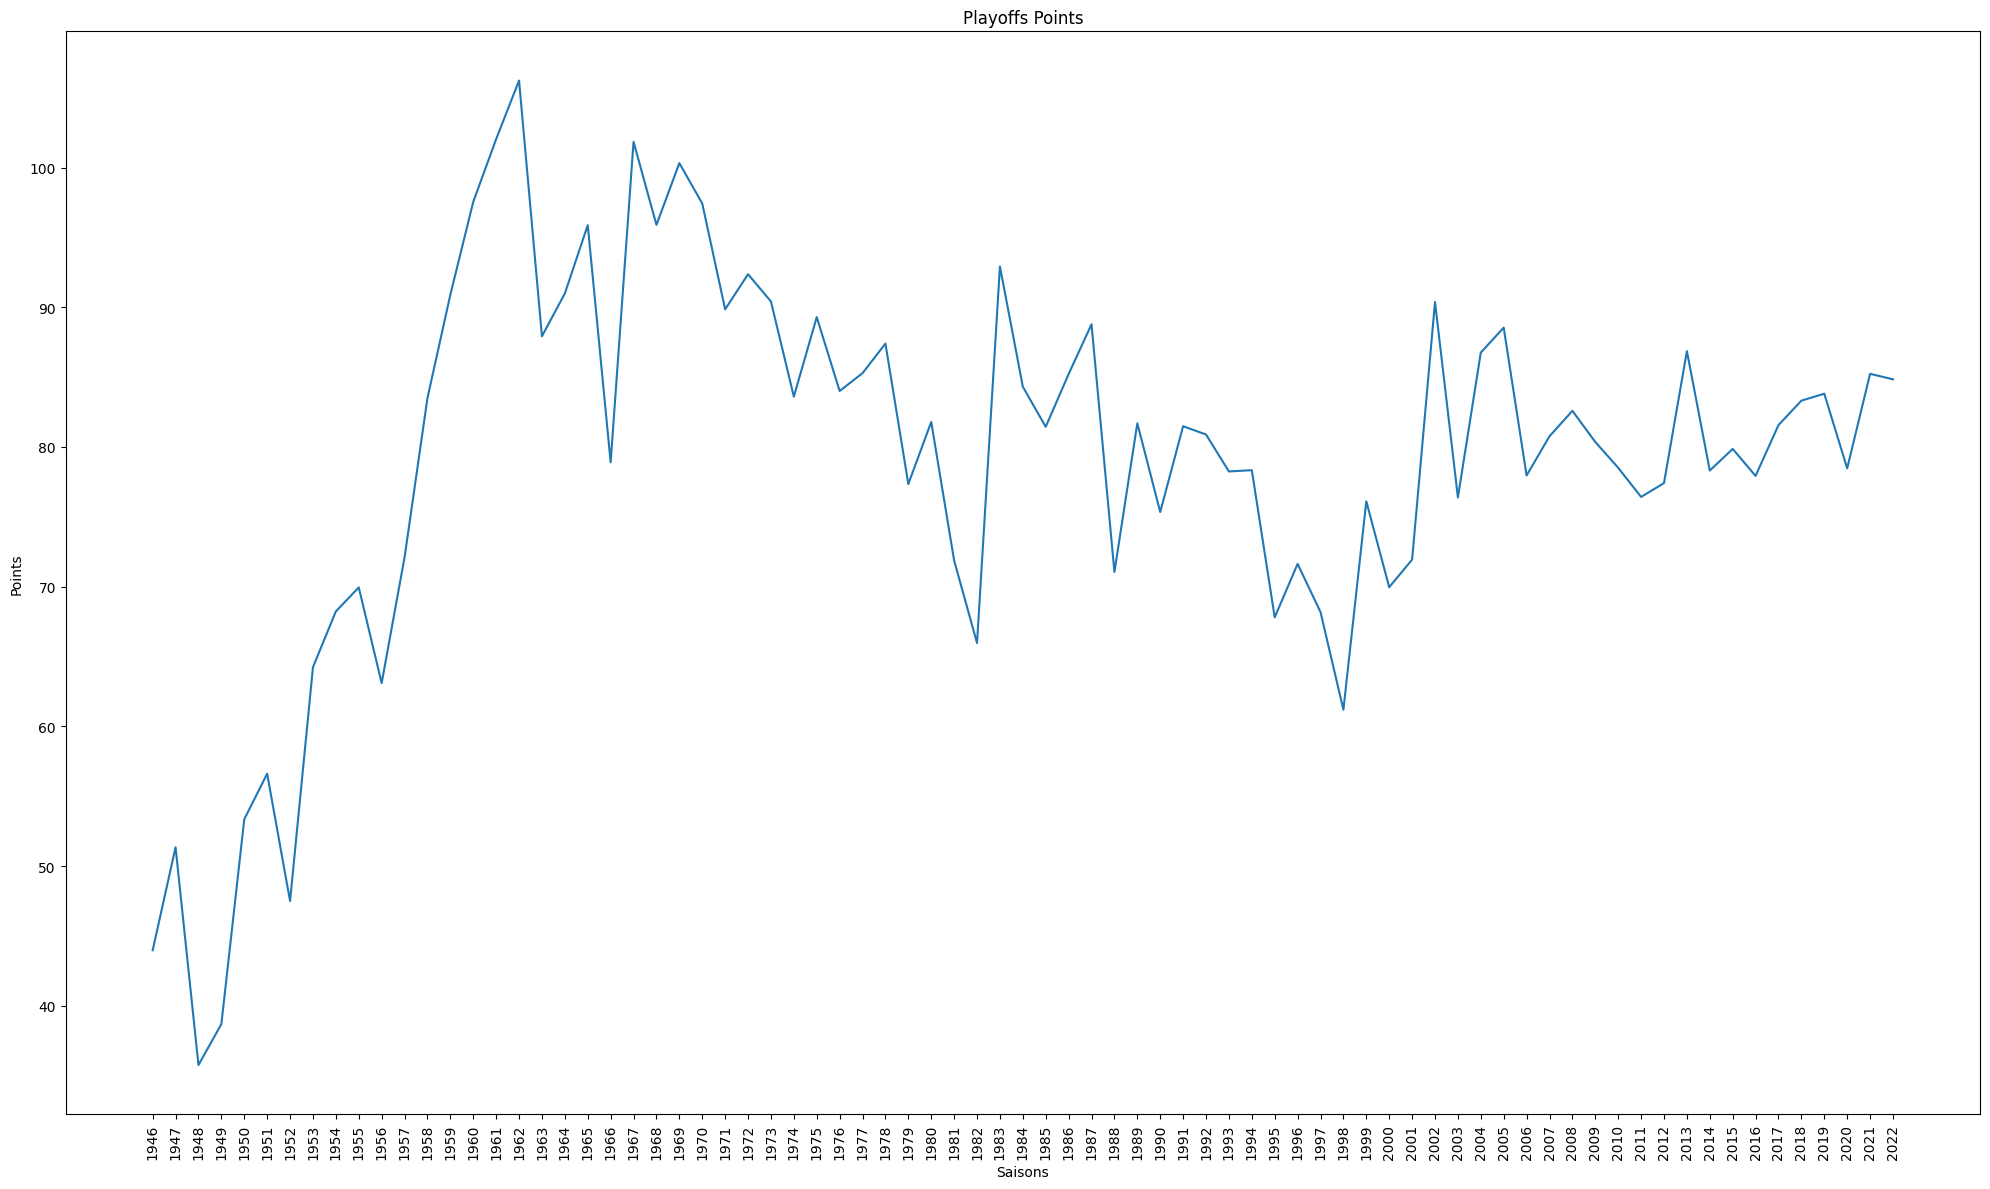

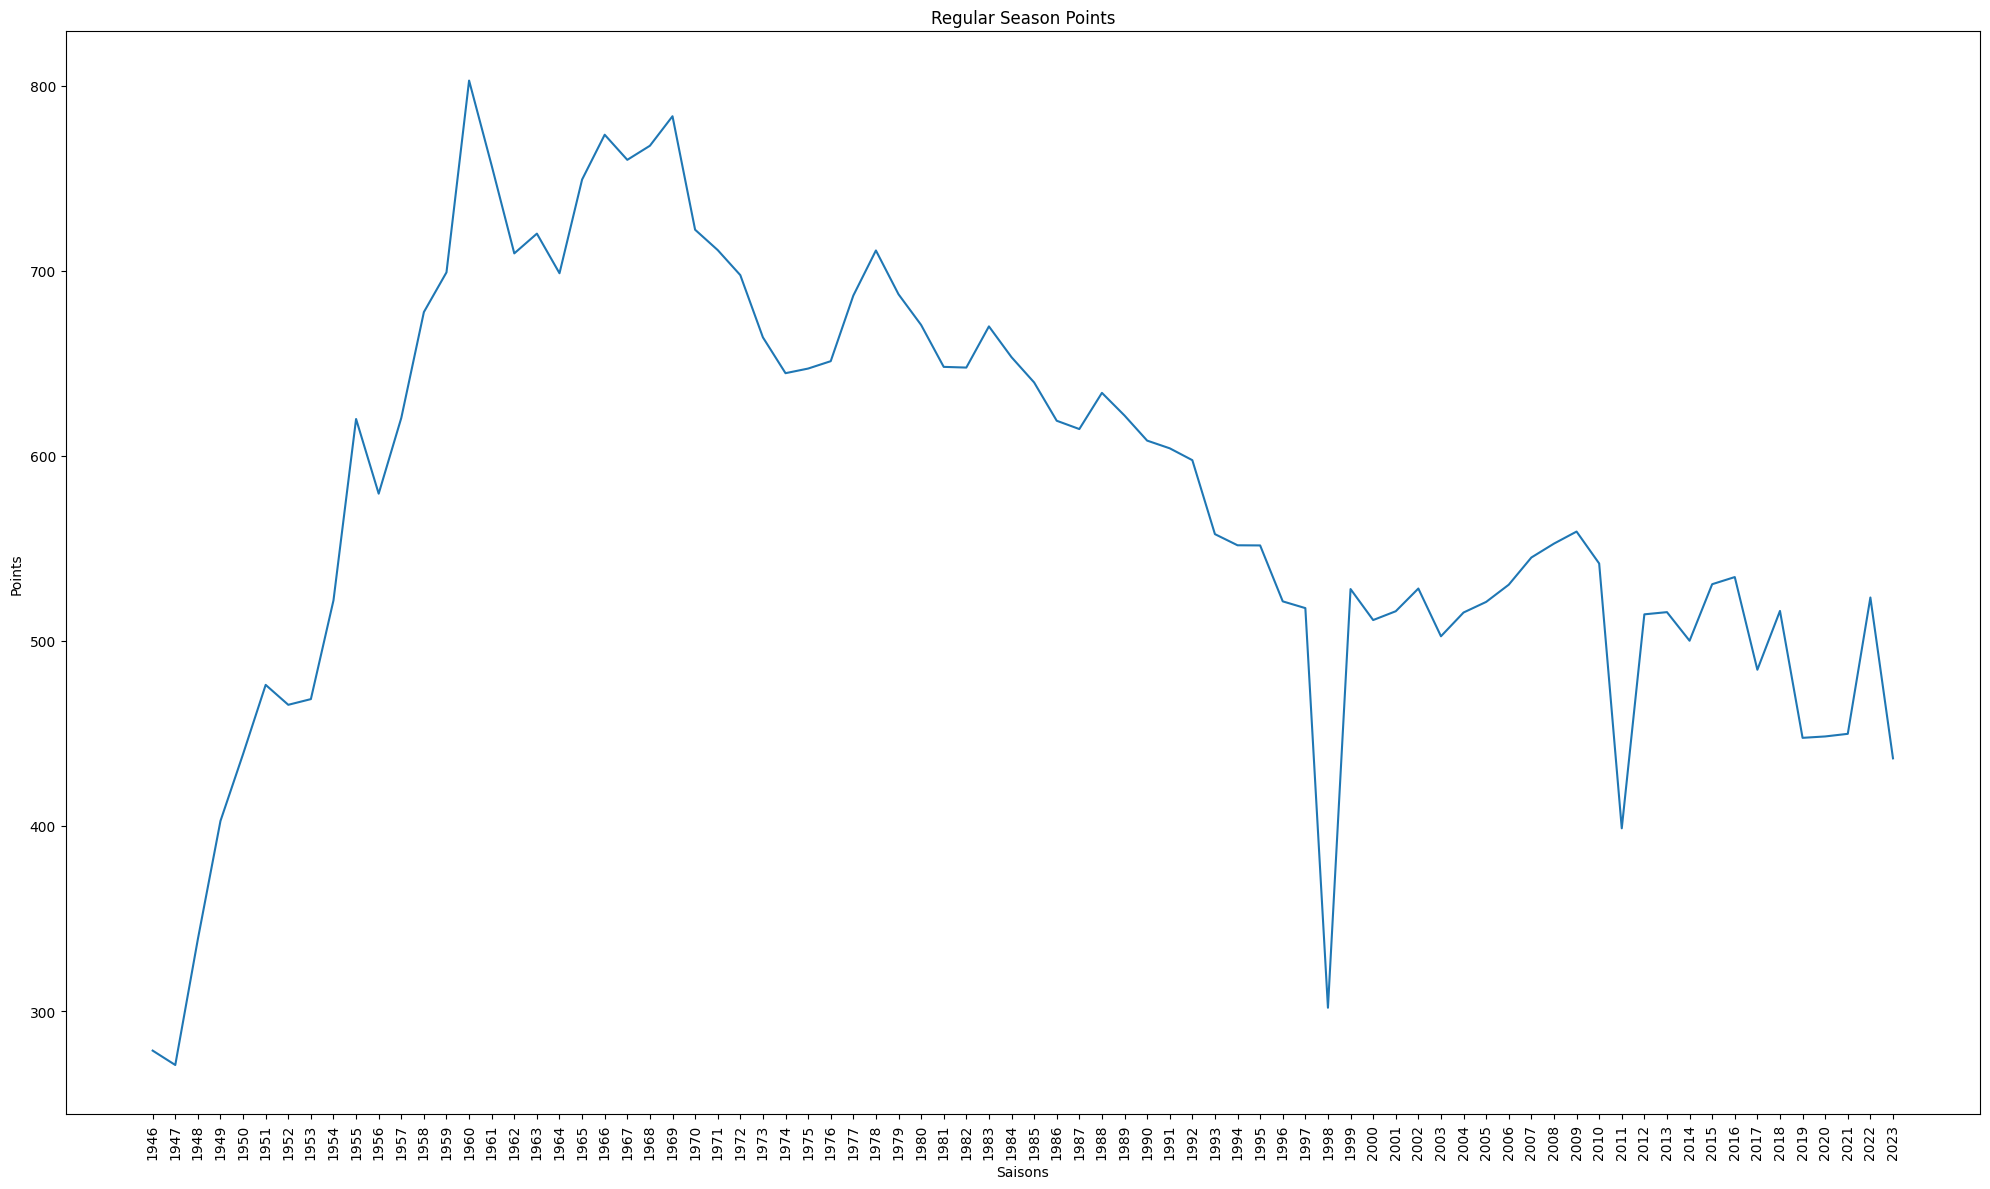

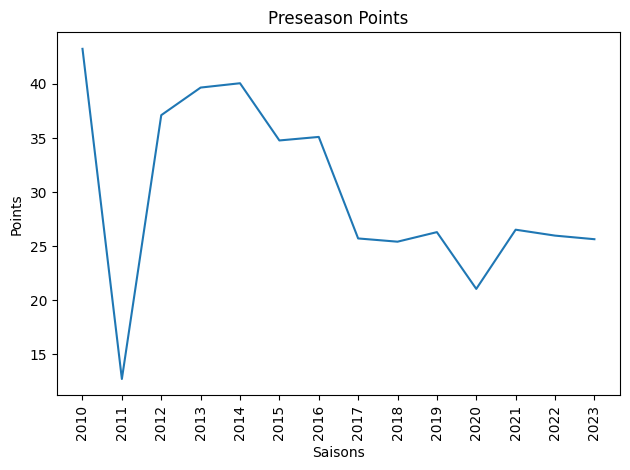

In [200]:
# Convertir la colonne 'PTS' en format entier
for df in players_stat_df_list:
    if df['PTS'].dtype != 'int64':
        df['PTS'] = df['PTS'].str.replace(',', '').astype(int)

# Créer un dictionnaire vide pour chaque type de saison
summer_league_data = {}
playoffs_data = {}
regular_season_data = {}
preseason_data = {}

# Parcourir chaque DataFrame dans la liste players_stat_df_list
for df in players_stat_df_list:
    # Extraire l'année de la saison
    saison = df['Title'].iloc[0].split(' ')[2]
    annee = df['Title'].iloc[0].split(' ')[1]
    
    # Extraire les points
    points = df['PTS'].mean()
    
    # Ajouter les données au dictionnaire approprié
    if saison == 'Summer_League':
        if annee in summer_league_data:
            summer_league_data[annee].append(points)
        else:
            summer_league_data[annee] = [points]
    elif saison == 'Playoffs':
        if annee in playoffs_data:
            playoffs_data[annee].append(points)
        else:
            playoffs_data[annee] = [points]
    elif saison == 'Regular_Season':
        if annee in regular_season_data:
            regular_season_data[annee].append(points)
        else:
            regular_season_data[annee] = [points]
    elif saison == 'Preseason':
        if annee in preseason_data:
            preseason_data[annee].append(points)
        else:
            preseason_data[annee] = [points]

summer_league_data = dict(sorted(summer_league_data.items(), key=lambda x: x[0].split('-')[0]))
playoffs_data = dict(sorted(playoffs_data.items(), key=lambda x: x[0].split('-')[0]))
regular_season_data = dict(sorted(regular_season_data.items(), key=lambda x: x[0].split('-')[0]))
preseason_data = dict(sorted(preseason_data.items(), key=lambda x: x[0].split('-')[0]))

# # Afficher les données pour chaque type de saison
# print("Données pour Summer_League :", summer_league_data)
# print("Données pour Playoffs :", playoffs_data)
# print("Données pour Regular_Season :", regular_season_data)
# print("Données pour Preseason :", preseason_data)

# Graphique pour Summer League
years = [int(year.split('-')[0]) for year in summer_league_data.keys()]
values = [value[0] for value in summer_league_data.values()]

plt.plot(years, values)
plt.title('Summer League Points')
plt.xlabel('Saisons')
plt.ylabel('Points')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()

# Graphique pour Playoffs
years = [int(year.split('-')[0]) for year in playoffs_data.keys()]
values = [value[0] for value in playoffs_data.values()]

plt.figure(figsize=(20, 12))  
plt.plot(years, values)
plt.title('Playoffs Points')
plt.xlabel('Saisons')
plt.ylabel('Points')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()

# Graphique pour Regular Season
plt.figure(figsize=(20, 12))  
years = [int(year.split('-')[0]) for year in regular_season_data.keys()]
values = [value[0] for value in regular_season_data.values()]

plt.plot(years, values)
plt.title('Regular Season Points')
plt.xlabel('Saisons')
plt.ylabel('Points')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()

# Graphique pour Preseason
years = [int(year.split('-')[0]) for year in preseason_data.keys()]
values = [value[0] for value in preseason_data.values()]

plt.plot(years, values)
plt.title('Preseason Points')
plt.xlabel('Saisons')
plt.ylabel('Points')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()

### Moyenne des minutes par saison  

In [202]:
# Convertir la colonne 'MIN' en format entier
for df in players_stat_df_list:
    if df['MIN'].dtype == 'object':
        df['MIN'] = df['MIN'].str.replace(",", "").astype(float)
    else:
        df['MIN'] = df['MIN'].astype(float)
        
# Créer un dictionnaire vide pour chaque type de saison
summer_league_data = {}
playoffs_data = {}
regular_season_data = {}
preseason_data = {}

# Parcourir chaque DataFrame dans la liste players_stat_df_list
for df in players_stat_df_list:
    # Extraire l'année de la saison
    saison = df['Title'].iloc[0].split(' ')[2]
    annee = df['Title'].iloc[0].split(' ')[1]
    
    # Extraire les minutes
    mins = df['MIN'].mean()
    
    # Ajouter les données au dictionnaire approprié
    if saison == 'Summer_League':
        if annee in summer_league_data:
            summer_league_data[annee].append(mins)
        else:
            summer_league_data[annee] = [mins]
    elif saison == 'Playoffs':
        if annee in playoffs_data:
            playoffs_data[annee].append(mins)
        else:
            playoffs_data[annee] = [mins]
    elif saison == 'Regular_Season':
        if annee in regular_season_data:
            regular_season_data[annee].append(mins)
        else:
            regular_season_data[annee] = [mins]
    elif saison == 'Preseason':
        if annee in preseason_data:
            preseason_data[annee].append(mins)
        else:
            preseason_data[annee] = [mins]

summer_league_data = dict(sorted(summer_league_data.items(), key=lambda x: x[0].split('-')[0]))
playoffs_data = dict(sorted(playoffs_data.items(), key=lambda x: x[0].split('-')[0]))
regular_season_data = dict(sorted(regular_season_data.items(), key=lambda x: x[0].split('-')[0]))
preseason_data = dict(sorted(preseason_data.items(), key=lambda x: x[0].split('-')[0]))

# Afficher les données pour chaque type de saison
print("Données pour Summer_League :", summer_league_data)
print("Données pour Playoffs :", playoffs_data)
print("Données pour Regular_Season :", regular_season_data)
print("Données pour Preseason :", preseason_data)



Données pour Summer_League : {'2004-2005': [91.09154929577464], '2005-2006': [82.26996197718631], '2006-2007': [77.21164179104478], '2007-2008': [72.06196319018404], '2008-2009': [71.68081761006289], '2009-2010': [80.74633333333334], '2010-2011': [82.85353846153846], '2012-2013': [75.32727272727273], '2013-2014': [82.01642228739004], '2014-2015': [81.66170798898071], '2015-2016': [82.19285714285715], '2016-2017': [79.26373937677053], '2017-2018': [78.40880503144655], '2018-2019': [75.82843749999999], '2019-2020': [68.80472222222221], '2021-2022': [71.31428571428572], '2022-2023': [68.92035928143713], '2023-2024': [68.08730158730158]}
Données pour Playoffs : {'1946-1947': [0.0], '1947-1948': [0.0], '1948-1949': [0.0], '1949-1950': [0.0], '1950-1951': [0.0], '1951-1952': [161.18421052631578], '1952-1953': [142.27848101265823], '1953-1954': [191.20689655172413], '1954-1955': [170.66666666666666], '1955-1956': [168.0], '1956-1957': [143.38983050847457], '1957-1958': [168.0], '1958-1959': [

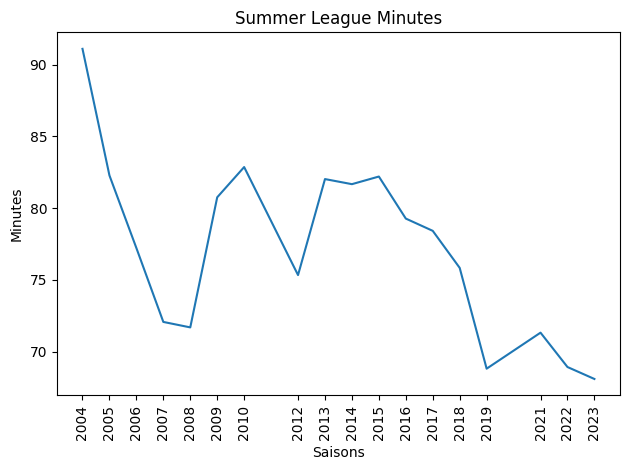

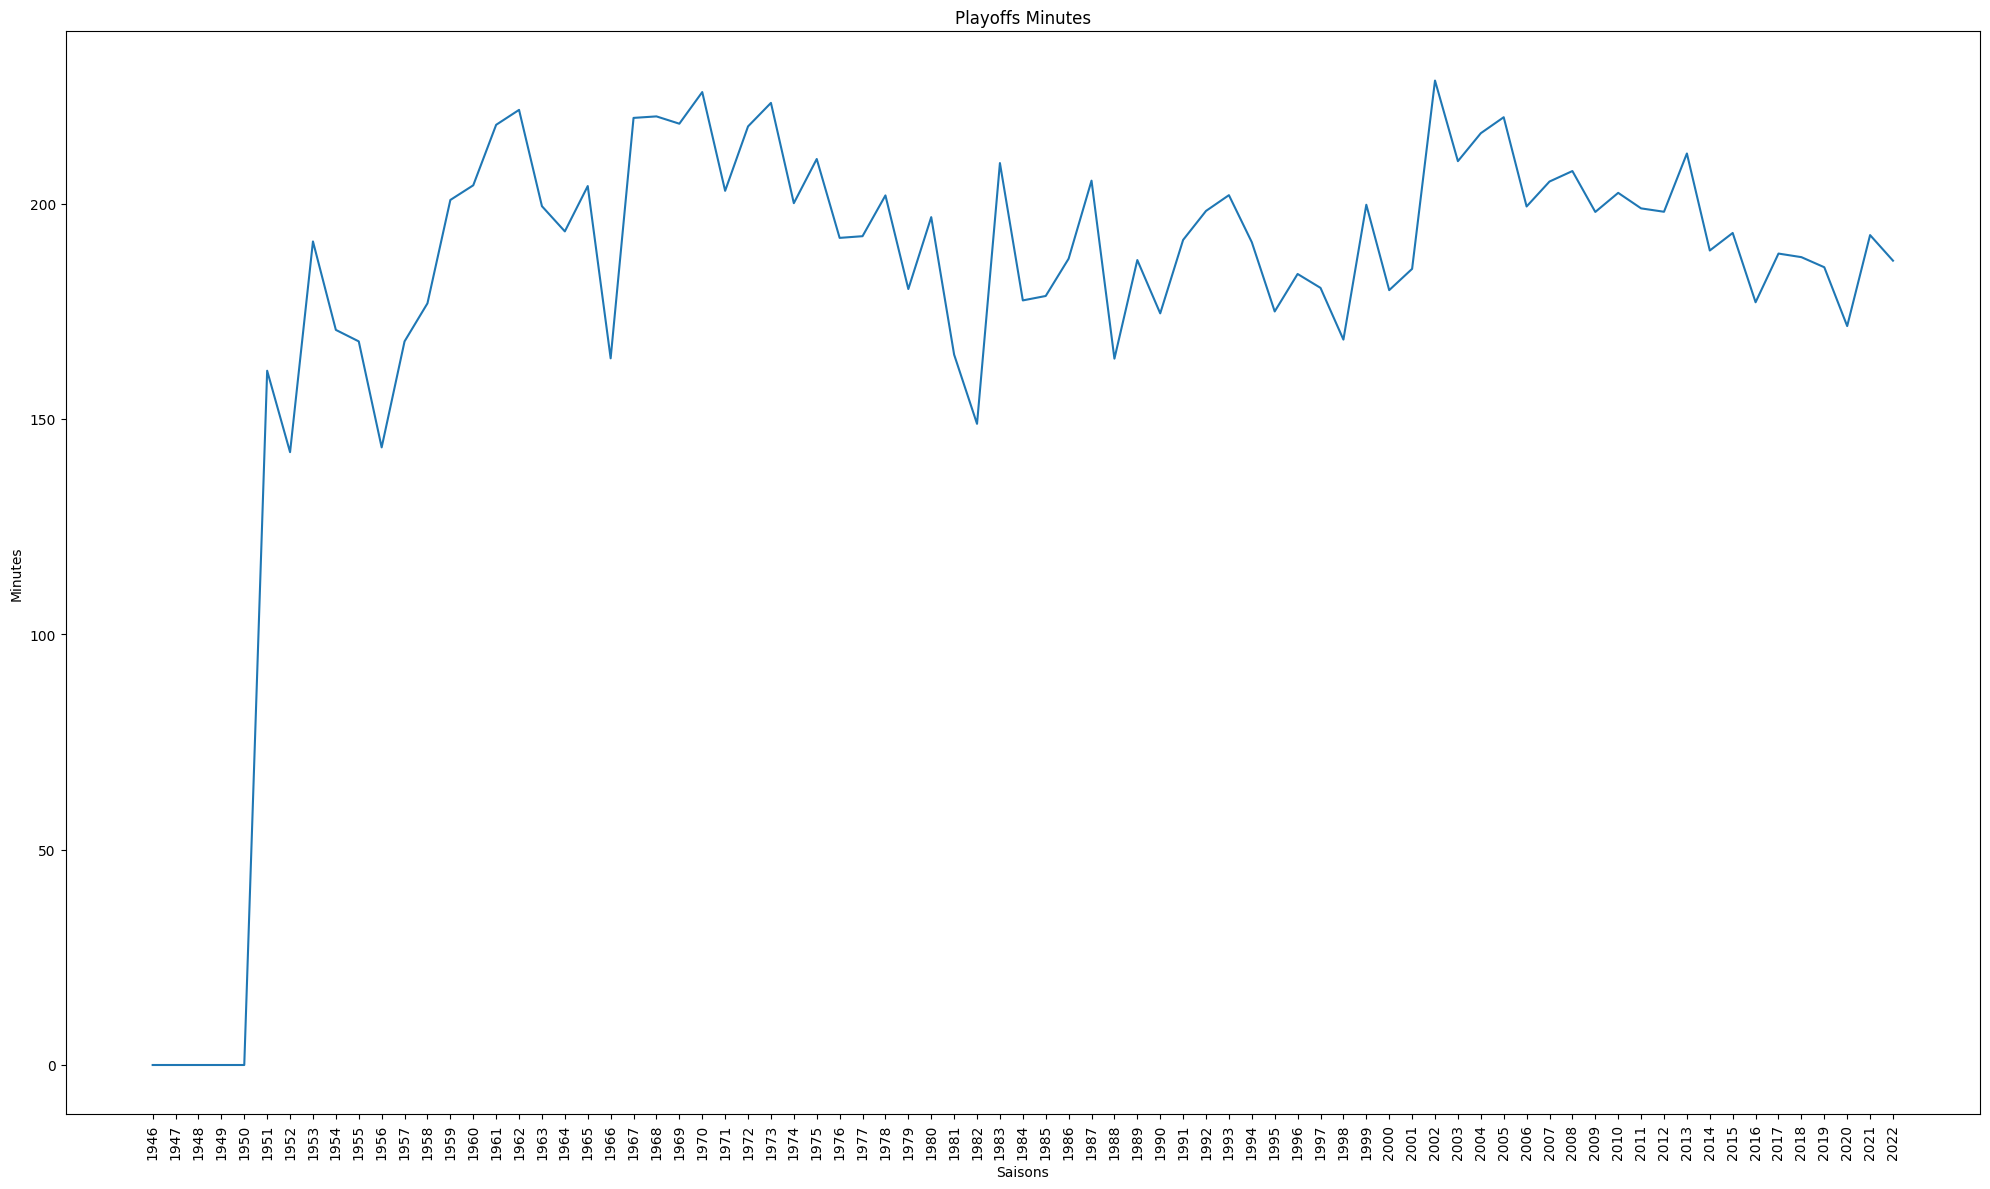

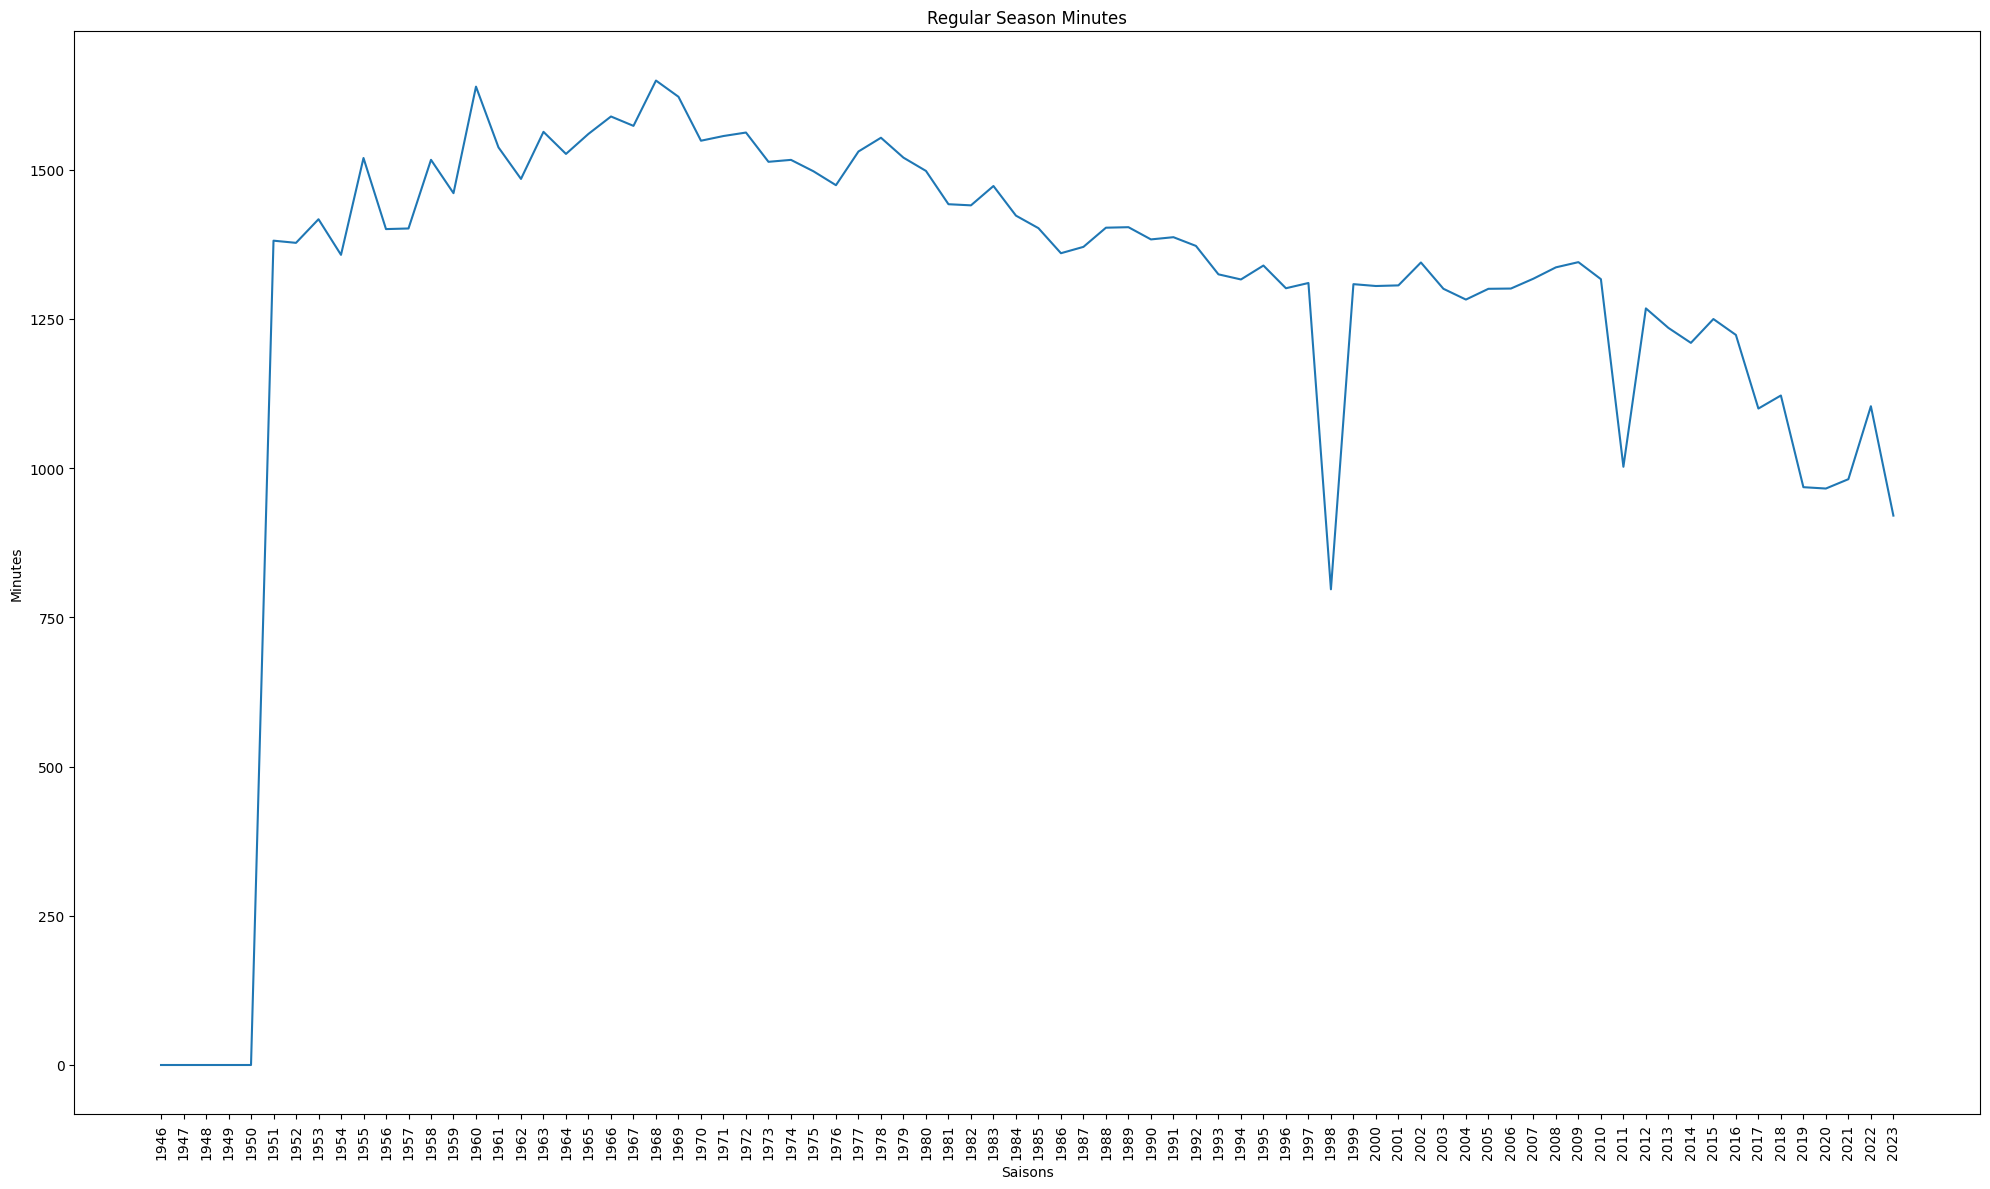

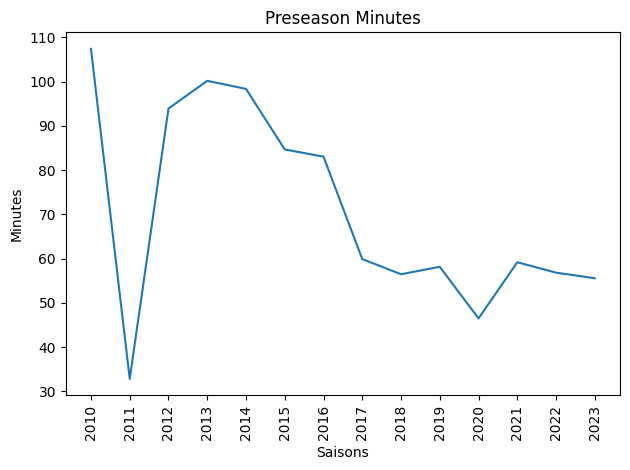

In [203]:
# Graphique pour Summer League
years = [int(year.split('-')[0]) for year in summer_league_data.keys()]
values = [value[0] for value in summer_league_data.values()]

plt.plot(years, values)
plt.title('Summer League Minutes')
plt.xlabel('Saisons')
plt.ylabel('Minutes')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()

# Graphique pour Playoffs
years = [int(year.split('-')[0]) for year in playoffs_data.keys()]
values = [value[0] for value in playoffs_data.values()]

plt.figure(figsize=(20, 12))  
plt.plot(years, values)
plt.title('Playoffs Minutes')
plt.xlabel('Saisons')
plt.ylabel('Minutes')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()

# Graphique pour Regular Season
plt.figure(figsize=(20, 12))  
years = [int(year.split('-')[0]) for year in regular_season_data.keys()]
values = [value[0] for value in regular_season_data.values()]

plt.plot(years, values)
plt.title('Regular Season Minutes')
plt.xlabel('Saisons')
plt.ylabel('Minutes')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()

# Graphique pour Preseason
years = [int(year.split('-')[0]) for year in preseason_data.keys()]
values = [value[0] for value in preseason_data.values()]

plt.plot(years, values)
plt.title('Preseason Minutes')
plt.xlabel('Saisons')
plt.ylabel('Minutes')

plt.xticks(rotation='vertical')
plt.xticks(years)
plt.tight_layout()

plt.show()